In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("C:/Users/vaishnavi/Desktop/DBDA/ML Practical/Day_2/Social_Network_ads.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [9]:
#To check correlation between x as Nominal and y as numeric
#use the  ANOVA test

In [3]:
X = df[['Age','Salary']].values
X.shape

(284, 2)

In [4]:
y = df['Purchased'].values
y.shape

(284,)

In [5]:
from sklearn.preprocessing import StandardScaler
#std score of sample x is calculates as:
# z= (x-u)/s
#u is mean, s is standard deviation

In [6]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [7]:
X_sc[:5,:]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [8]:

sc.inverse_transform(X_sc[0:1,:])

array([[   19., 19000.]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:

X_train,X_test,y_train,y_test = train_test_split(X_sc,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [22]:
#as per practitioners rule best k =square root of no of observation
227**0.5

15.066519173319364

In [23]:
 model = KNeighborsClassifier(n_neighbors = 15, p = 2, metric = 'minkowski')
model.fit(X_train,y_train).score(X_test,y_test)

0.9473684210526315

In [26]:
age = np.arange(X_test[:,0].min()-0.2,X_test[:,0].max()+0.2,0.01)
sal = np.arange(X_test[:,1].min()-0.2,X_test[:,1].max()+0.2,0.01)
Age , Sal  = np.meshgrid(age, sal)
print(Age.shape, Sal.shape)

(408, 424) (408, 424)


In [27]:
formed_data = np.c_[Age.ravel(),Sal.ravel()]

In [28]:
Z1 = model.predict(formed_data).reshape(Age.shape) 

In [29]:
Z1.shape

(408, 424)

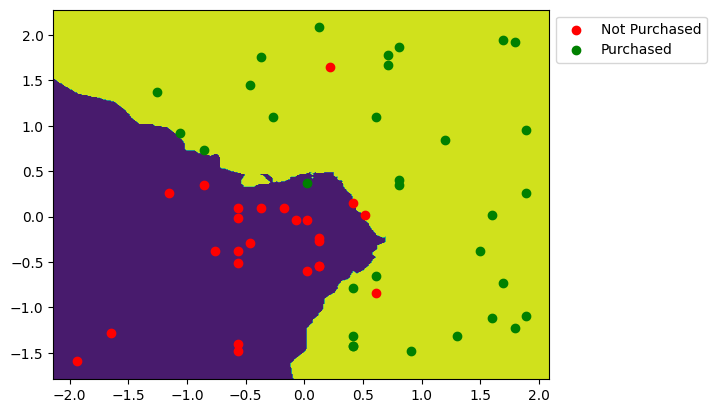

In [30]:
plt.contourf(Age, Sal, Z1)
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c = 'r', label ="Not Purchased")
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c = 'Green', label ="Purchased")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

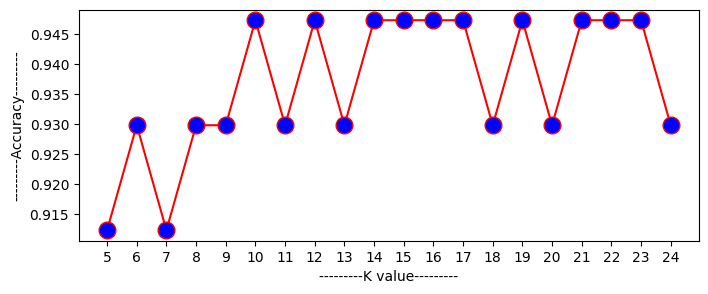

In [34]:
acc=[]
for K in range(5,25):
     model = KNeighborsClassifier(n_neighbors = K, p = 2, metric = 'minkowski')
     acc.append(model.fit(X_train,y_train).score(X_test,y_test))

plt.figure(figsize=(8,3))
plt.plot(range(5,25),acc,marker= 'o',c = 'r' ,mfc = 'b',ms = 12)
plt.xticks(range(5,25))
plt.xlabel("---------K value---------")
plt.ylabel("---------Accuracy---------")
plt.show